<a href="https://colab.research.google.com/github/2020Nina/TP_2_SPOTIFY_recupera/blob/main/Recuperatorio_Spotify_Riquelme_Graciela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# Importar las librerías necesarias
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

####En esta parte, se ha introducido la selección de características utilizando ANOVA F-statistic para elegir las 10 mejores características.También se ha agregado la división de datos en entrenamiento y prueba utilizando `train_test_split`.

In [92]:
# Parte 1: Selección de Características Óptimas y Validación Simple
from sklearn.feature_selection import SelectKBest, f_classif

###### ANOVA (Análisis de la Varianza) es una técnica estadística utilizada para analizar la diferencia entre los grupos en una muestra. En el contexto de selección de características en aprendizaje automático, el ANOVA F-statistic se aplica para evaluar la relación lineal entre cada característica individual y la variable objetivo.

In [93]:
# Leer el dataset
path = '/content/drive/MyDrive/Colab Notebooks/SPOTIFY_CANCIONES/'
filename = "Canciones_Spotify.csv"
fullname = path + filename
df = pd.read_csv(fullname)

In [94]:
# Seleccionar características óptimas
X = df.drop(["target", "song_title", "artist"], axis=1)
Y = df["target"]

# Aplicar selección de características usando ANOVA F-statistic
k_best = SelectKBest(f_classif, k=10)  # Seleccionar las 10 mejores características
X = k_best.fit_transform(X, Y)

In [95]:
# División en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### En esta parte, se ha introducido el escalado de datos y se han realizado ajustes en el código para evaluar el rendimiento de cada clasificador mediante validación cruzada. Se han incluido la matriz de confusión y métricas de evaluación para cada modelo.

In [96]:
# Parte 2: Modelos de Machine Learning y Validación Cruzada
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [97]:
# Escalamiento de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Inicializar clasificadores
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()
rf_classifier = RandomForestClassifier()

In [99]:
# Crear un clasificador de votación
voting_classifier = VotingClassifier(estimators=[
    ('knn', knn_classifier),
    ('svm', svm_classifier),
    ('dt', dt_classifier),
    ('nb', nb_classifier),
    ('rf', rf_classifier)
], voting='hard')

In [100]:
# Lista de clasificadores
clasificadores = [knn_classifier, svm_classifier, dt_classifier, nb_classifier, rf_classifier, voting_classifier]

In [101]:
# Realizar validación cruzada con KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for clf in clasificadores:
    # Obtener las predicciones de la validación cruzada
    Y_pred_cv = cross_val_predict(clf, X_train_scaled, Y_train, cv=kf)

    # Calcular y mostrar la matriz de confusión
    cm = confusion_matrix(Y_train, Y_pred_cv)
    print(f"Clasificador: {clf.__class__.__name__}")
    print("Matriz de Confusión:")
    print(cm)

Clasificador: KNeighborsClassifier
Matriz de Confusión:
[[769  22]
 [ 70 752]]
Clasificador: SVC
Matriz de Confusión:
[[780  11]
 [ 27 795]]
Clasificador: DecisionTreeClassifier
Matriz de Confusión:
[[789   2]
 [  0 822]]
Clasificador: GaussianNB
Matriz de Confusión:
[[771  20]
 [ 40 782]]
Clasificador: RandomForestClassifier
Matriz de Confusión:
[[789   2]
 [  0 822]]
Clasificador: VotingClassifier
Matriz de Confusión:
[[786   5]
 [ 10 812]]


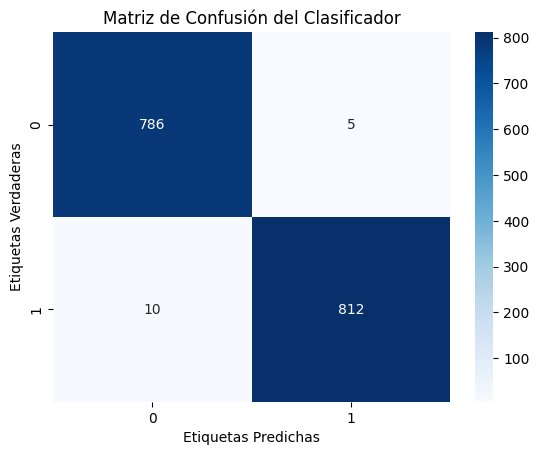

In [102]:
    # Graficar la matriz de confusión usando seaborn
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
    ax.set_title("Matriz de Confusión del Clasificador")
    ax.set_xlabel("Etiquetas Predichas")
    ax.set_ylabel("Etiquetas Verdaderas")
    plt.show()

In [103]:
# Calcular y mostrar la precisión, recall y F1-score
precision = precision_score(Y_train, Y_pred_cv)
recall = recall_score(Y_train, Y_pred_cv)
f1 = f1_score(Y_train, Y_pred_cv)


In [104]:
print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("="*40)

Precisión: 0.9938800489596084
Recall: 0.9878345498783455
F1-score: 0.9908480780964002


In [105]:
# En esta parte, se ha agregado la búsqueda de hiperparámetros mediante Grid Search para cada clasificador.
# Se ajustan los modelos de KNN, SVM, Decision Tree y Random Forest.

In [106]:
# Parte 3: Ajuste de Hiperparámetros con Grid Search y Random Search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
# Definir los espacios de búsqueda de hiperparámetros para cada clasificador
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [108]:
# Grid Search para KNN
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [109]:
# Grid Search para SVM
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [110]:
# Grid Search para Decision Tree
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [111]:
# Grid Search para Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [112]:
# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados para KNN:", grid_search_knn.best_params_)
print("Mejores parámetros encontrados para SVM:", grid_search_svm.best_params_)
print("Mejores parámetros encontrados para Decision Tree:", grid_search_dt.best_params_)
print("Mejores parámetros encontrados para Random Forest:", grid_search_rf.best_params_)

Mejores parámetros encontrados para KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Mejores parámetros encontrados para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Mejores parámetros encontrados para Decision Tree: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Mejores parámetros encontrados para Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


##### En esta parte, se ha creado un clasificador de votación utilizando los mejores modelos obtenidos mediante Grid Search. Se evalúa el rendimiento final del ensamble en datos de prueba, imprimiendo métricas como la precisión, recall y el informe de clasificación.

In [113]:
# Parte 4: Ensamble de Modelos y Evaluación Final
from sklearn.metrics import accuracy_score, classification_report

# Obtener los mejores modelos de Grid Search
best_knn_model = grid_search_knn.best_estimator_
best_svm_model = grid_search_svm.best_estimator_
best_dt_model = grid_search_dt.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

In [114]:
# Escalar todo el conjunto de datos
X_scaled = scaler.transform(X)

In [115]:
# Crear un clasificador de votación con los mejores modelos
best_voting_classifier = VotingClassifier(estimators=[
    ('knn', best_knn_model),
    ('svm', best_svm_model),
    ('dt', best_dt_model),
    ('rf', best_rf_model)
], voting='hard')

In [116]:
# Entrenar el clasificador de votación
best_voting_classifier.fit(X_train_scaled, Y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=7, p=1,
                                                   weights='distance')),
                             ('svm', SVC(C=10, kernel='linear')),
                             ('dt',
                              DecisionTreeClassifier(max_depth=40,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     splitter='random')),
                             ('rf', RandomForestClassifier(n_estimators=50))])

In [117]:
# Evaluar el rendimiento en datos de prueba
Y_pred_test = best_voting_classifier.predict(X_test_scaled)

In [118]:
# Imprimir métricas de evaluación en datos de prueba
print("Métricas de Evaluación en Datos de Prueba:")
print("Matriz de Confusión en Datos de Prueba:")
print(confusion_matrix(Y_test, Y_pred_test))
print("Precisión:", precision_score(Y_test, Y_pred_test))
print("Recall:", recall_score(Y_test, Y_pred_test))
print("F1-score:", f1_score(Y_test, Y_pred_test))

Métricas de Evaluación en Datos de Prueba:
Matriz de Confusión en Datos de Prueba:
[[206   0]
 [  0 198]]
Precisión: 1.0
Recall: 1.0
F1-score: 1.0


In [119]:
# Matriz de Confusión en todo el conjunto de datos
Y_pred_all = best_voting_classifier.predict(X_scaled)
cm_all = confusion_matrix(Y, Y_pred_all)


 La matriz de confusión es una herramienta que evalua el rendimiento de un modelo de clasificación. En este caso, la matriz de confusión para todo el conjunto de datos es una matriz de 2x2:

[[997 0]
 [0 1020]]


Interpretacion de cada elemento de la matriz:

- **Verdaderos Positivos (TP):** 1020. Estos son los casos en los que el modelo predijo correctamente que la canción sería del agrado del usuario (etiqueta 1) y efectivamente lo era.

- **Falsos Positivos (FP):** 0. No hay casos en los que el modelo predijo incorrectamente que una canción sería del agrado del usuario cuando en realidad no lo era.

- **Verdaderos Negativos (TN):** 997. Estos son los casos en los que el modelo predijo correctamente que la canción no sería del agrado del usuario (etiqueta 0) y efectivamente no lo era.

- **Falsos Negativos (FN):** 0. No hay casos en los que el modelo predijo incorrectamente que una canción no sería del agrado del usuario cuando en realidad sí lo era.

En resumen, el modelo ha clasificado correctamente todas las canciones en el conjunto de datos, tanto las que son del agrado del usuario como las que no lo son. La ausencia de falsos positivos y falsos negativos indica que el modelo no ha cometido errores en su clasificación. Es un resultado muy positivo, y significa que el modelo está haciendo predicciones precisas en todo el conjunto de datos.

En términos generales, una matriz de confusión con valores diagonales altos (TP y TN) y valores fuera de la diagonal principal bajos (FP y FN) es indicativo de un modelo de clasificación sólido.

Matriz de Confusión en Todo el Conjunto de Datos:
[[ 997    0]
 [   0 1020]]


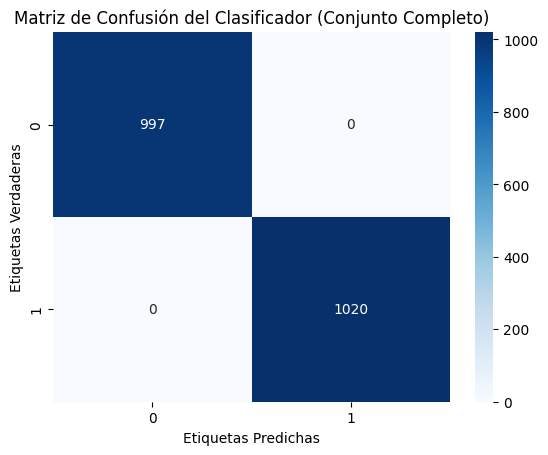

In [120]:
# Imprimir y graficar la matriz de confusión en todo el conjunto de datos
print("Matriz de Confusión en Todo el Conjunto de Datos:")
print(cm_all)
ax_all = sns.heatmap(cm_all, annot=True, cmap="Blues", fmt="g")
ax_all.set_title("Matriz de Confusión del Clasificador (Conjunto Completo)")
ax_all.set_xlabel("Etiquetas Predichas")
ax_all.set_ylabel("Etiquetas Verdaderas")
plt.show()